In [1]:
import matplotlib,matplotlib.pyplot
import networkx

# 0. user defined variables

In [2]:
reactome_folder='/Volumes/omics4tb2/alomana/projects/uwm/results/transcriptomics/tables/formatted/E/'
colors=['red','blue','orange','green']

In [3]:
# 1. read info

In [10]:
for color in colors:
    enrichment_file=reactome_folder+color+'_formatted.txt'
    enrichments={}
    with open(enrichment_file,'r') as f:
        next(f)
        for line in f:
            v=line.split('\t')
            if v[0] == '0':
                name=v[1]
                genes=v[8].split(',')
                enrichments[name]=genes
    # work on enrichmements, find common genes as interactions
    labels=list(enrichments.keys())
    for i in range(len(labels)):
        for j in range(len(labels)):
            if i < j:
                intersect=list(set(enrichments[labels[i]]) & set(enrichments[labels[j]]))
                print(i,j,len(intersect))
    break

0 1 0
0 2 0
0 3 1
0 4 0
1 2 16
1 3 3
1 4 16
2 3 4
2 4 17
3 4 4


In [ ]:
build graph based on sizenode=number of genes and edge based on number of shared. check that larger weight means shorter distance in figure

In [5]:
G = networkx.Graph()

In [6]:
G.add_edge('a', 'b', weight=0.6)
G.add_edge('a', 'c', weight=0.2)
G.add_edge('c', 'd', weight=0.1)
G.add_edge('c', 'e', weight=0.7)
G.add_edge('c', 'f', weight=0.9)
G.add_edge('a', 'd', weight=0.3)

In [7]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]

In [8]:
# positions for all nodes
pos = networkx.spring_layout(G)  

# draw

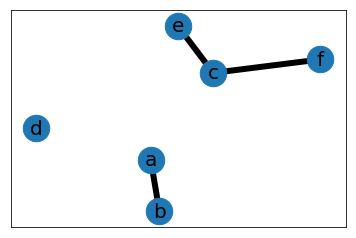

In [9]:
# nodes
networkx.draw_networkx_nodes(G, pos, node_size=700)

# edges
networkx.draw_networkx_edges(G, pos, edgelist=elarge,width=6)

# labels
tempo=networkx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
#matplotlib.pyplot.axis('off')